In [ ]:
pip install pandas


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("uber.csv")

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
df = df.drop(['Unnamed: 0', 'key'],axis = 1)

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
#Filling missing values
df.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [13]:
df.isnull().sum().sum()

2

In [14]:
df['dropoff_longitude'].fillna(value = df['dropoff_longitude'].mean(),inplace = True)
df['dropoff_latitude'].fillna(value = df['dropoff_latitude'].median(), inplace = True)

In [15]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [16]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  200000 non-null  float64            
 5   dropoff_latitude   200000 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


fare_amount             Axes(0.125,0.653529;0.352273x0.226471)
pickup_longitude     Axes(0.547727,0.653529;0.352273x0.226471)
pickup_latitude         Axes(0.125,0.381765;0.352273x0.226471)
dropoff_longitude    Axes(0.547727,0.381765;0.352273x0.226471)
dropoff_latitude            Axes(0.125,0.11;0.352273x0.226471)
passenger_count          Axes(0.547727,0.11;0.352273x0.226471)
dtype: object

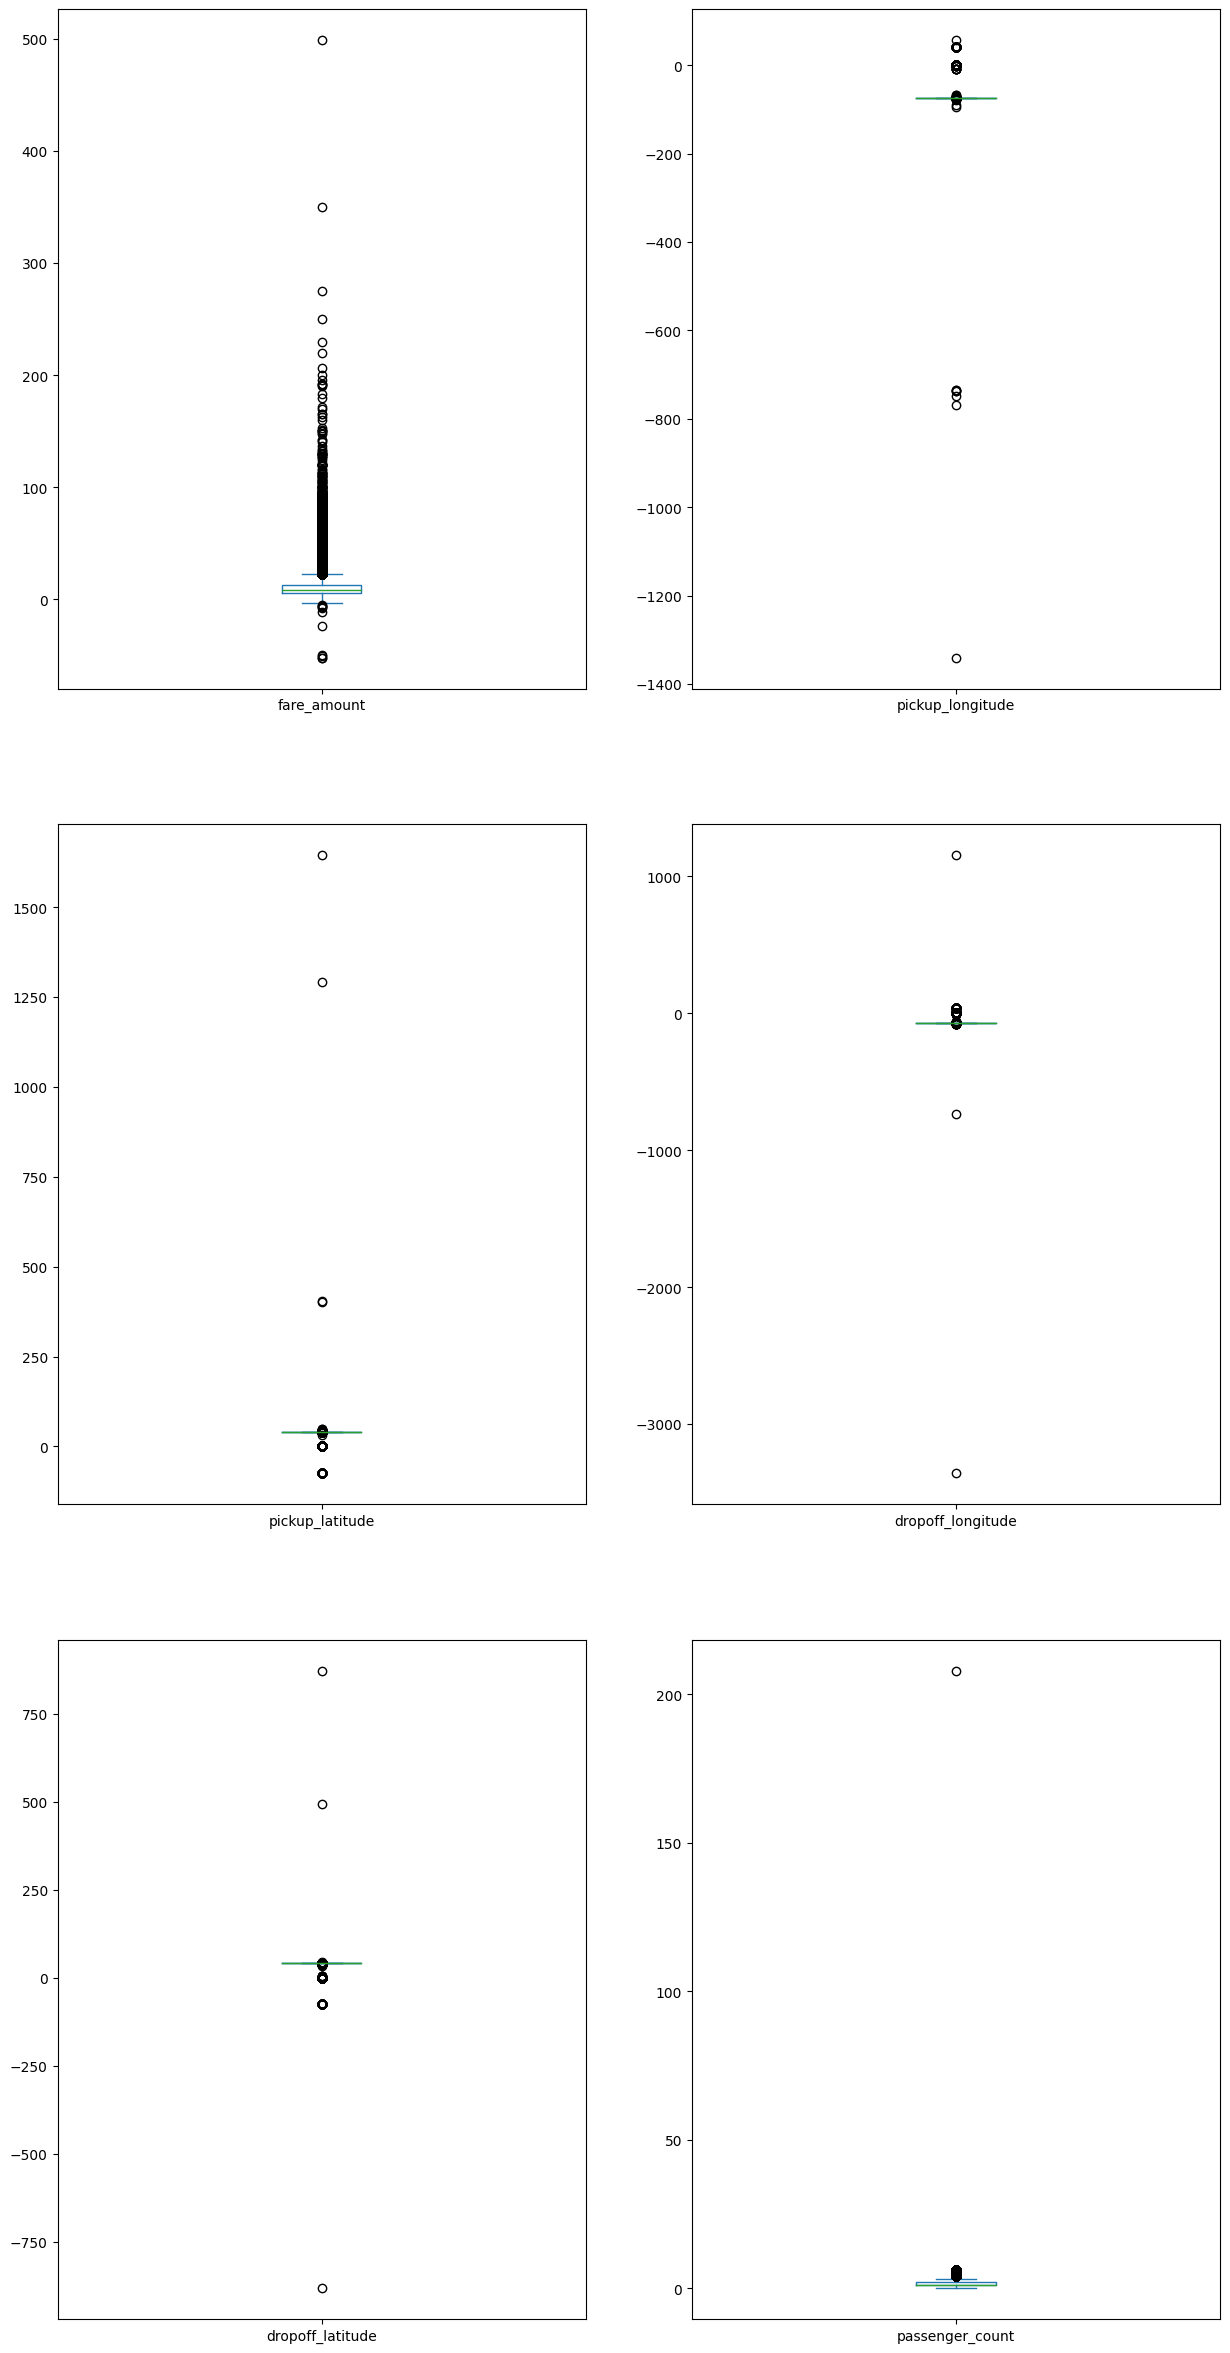

In [20]:
df.plot(kind = 'box', subplots = True, layout = (3,2), figsize = (15,30))

In [24]:
# Eliminating Outliers
# Using the InterQuartile Range to fill the values

def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q2 = df1[col].quantile(0.50)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df1[col] = np.clip(df1[col], lower, upper)
    return df1

def treat_outliers_all(df1, col_list):
    print("col_list", col_list)
    for c in col_list:
        df1 = remove_outlier(df1,c)
    return df1

In [25]:
df = treat_outliers_all(df, df.columns)

col_list Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

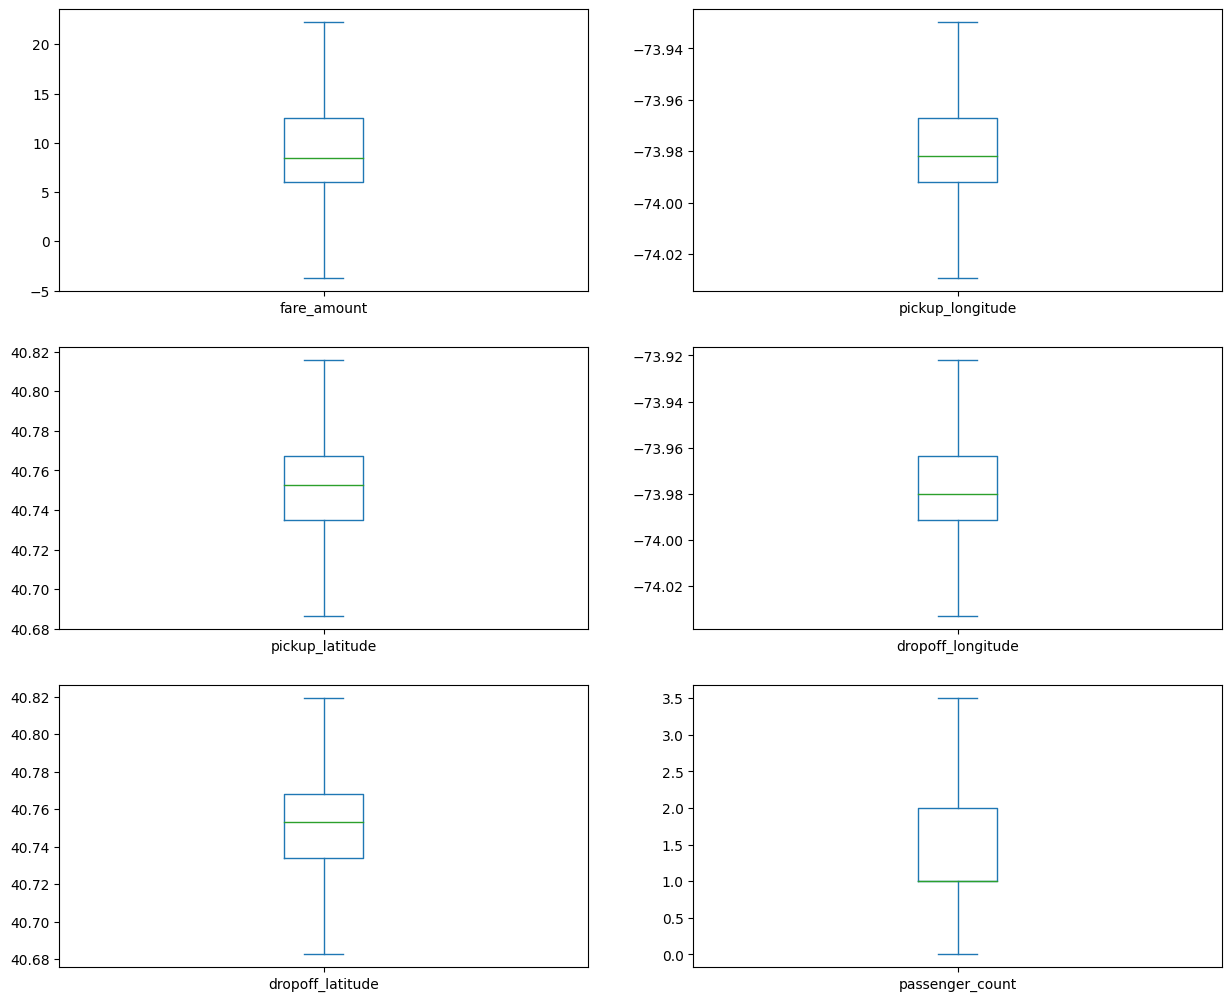

In [26]:
df.plot(kind = 'box', subplots = True, layout = (7,2), figsize = (15,30))

In [27]:
#checking correlation
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.146982,0.154069,-0.110842,0.218704,-0.125871,0.015778
pickup_datetime,0.146982,1.000000,0.010404,-0.014087,0.011723,-0.009870,-0.008159
pickup_longitude,0.154069,0.010404,1.000000,0.259497,0.425631,0.073311,-0.013213
pickup_latitude,-0.110842,-0.014087,0.259497,1.000000,0.048898,0.515735,-0.012889
dropoff_longitude,0.218704,0.011723,0.425631,0.048898,1.000000,0.245665,-0.009325
dropoff_latitude,-0.125871,-0.009870,0.073311,0.515735,0.245665,1.000000,-0.006329
passenger_count,0.015778,-0.008159,-0.013213,-0.012889,-0.009325,-0.006329,1.000000


In [28]:

# Applying Learning models
from sklearn.model_selection import train_test_split

In [26]:
x = df.drop("fare_amount", axis = 1)
y = df['fare_amount']

In [27]:
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))


In [28]:
x

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,1431028326000000000,-73.999817,40.738354,-73.999512,40.723217,1.0
1,1247861096000000000,-73.994355,40.728225,-73.994710,40.750325,1.0
2,1251150300000000000,-74.005043,40.740770,-73.962565,40.772647,1.0
3,1246004541000000000,-73.976124,40.790844,-73.965316,40.803349,3.0
4,1409248020000000000,-73.929786,40.744085,-73.973082,40.761247,3.5
...,...,...,...,...,...,...
199995,1351421340000000000,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,1394759340000000000,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,1246236120000000000,-73.986017,40.756487,-73.922034,40.692588,2.0
199998,1432133785000000000,-73.997124,40.725452,-73.983215,40.695415,1.0


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linear = LinearRegression()

In [34]:
linear.fit(x_train, y_train)

LinearRegression()

In [35]:
predict = linear.predict(x_test)

In [36]:
# check error
from sklearn.metrics import mean_squared_error
linear_mse = np.sqrt(mean_squared_error(predict,y_test))
print("RMSE error for the model is ", linear_mse)

RMSE error for the model is  5.391719394240839


In [37]:
# applying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators= 100, random_state = 101)

In [38]:
rfrmodel.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [39]:
rfr_predict = rfrmodel.predict(x_test)

In [40]:
rfr_mse = np.sqrt(mean_squared_error(rfr_predict, y_test))
print("RMSE value for Random forest is : ", rfr_mse)

RMSE value for Random forest is :  2.537759395144496
